In [3]:
import numpy as np
import pandas as pd
import os
import sys
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
import scipy
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# define one parameter likelihood



# rename to fast likelihood
def normal_mean_likelihood(mu, sigma, sample):
    sample = sample.reshape(-1, 1, 1)
    scaling_factor = 1 / np.sqrt(2 * np.pi * sigma ** 2)
    exponent = - 1 / (2 * sigma ** 2) * (sample - mu) ** 2
    like_contribs = scaling_factor * np.exp(exponent)
    likelihood = like_contribs.prod(axis=0)
    return likelihood

In [5]:
def plot_likelihood(sample_size):
    fig = plt.figure(figsize=(13, 7))
    ax = fig.add_subplot(111, projection='3d')
    mus, sigmas = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(0.1, 1.5, 100))
    x = np.random.normal(size=sample_size)
    likelihoods = normal_mean_likelihood(mus, sigmas, x)
    surf = ax.plot_surface(mus, sigmas, likelihoods, cmap='coolwarm', edgecolor='none')
    ax.set_xlabel('mu')
    ax.set_ylabel('sigma')
    ax.set_zlabel('Likelihood')
    ax.set_title('Likelihood Function')
    fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
    ax.view_init(20, 30)


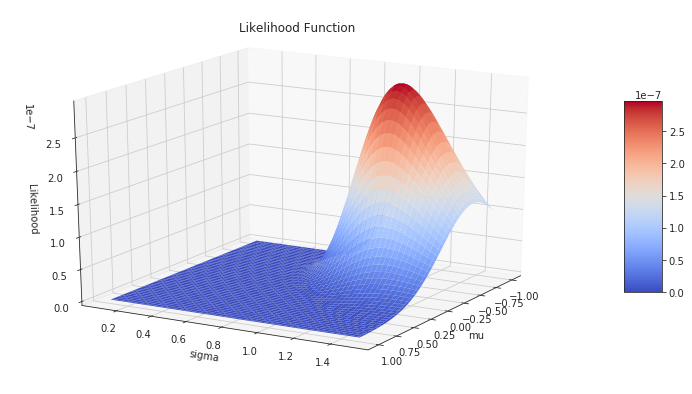

In [11]:
np.random.seed(5472)
plot_likelihood(10)

In [12]:
def normal_mean_loglikelihood(mu, sigma, sample):
    sample = sample.reshape(-1, 1, 1)
    scaling_factor = 1 / np.sqrt(2 * np.pi * sigma ** 2)
    exponent = - 1 / (2 * sigma ** 2) * (sample - mu) ** 2
    like_contribs = scaling_factor * np.exp(exponent)
    loglike = np.log(like_contribs).sum(axis=0)
    return loglike

In [13]:
def plot_loglikelihood(sample_size):
    fig = plt.figure(figsize=(13, 7))
    ax = fig.add_subplot(111, projection='3d')
    mus, sigmas = np.meshgrid(np.linspace(-0.6, 0.6, 100), np.linspace(0.7, 1.3, 100))
    x = np.random.normal(size=sample_size)
    likelihoods = normal_mean_loglikelihood(mus, sigmas, x)
    surf = ax.plot_surface(mus, sigmas, likelihoods, cmap='coolwarm', edgecolor='none')
    ax.set_xlabel('mu')
    ax.set_ylabel('sigma')
    ax.set_zlabel('Log-Likelihood')
    ax.set_title('Log-Likelihood Function')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.view_init(20, 30)

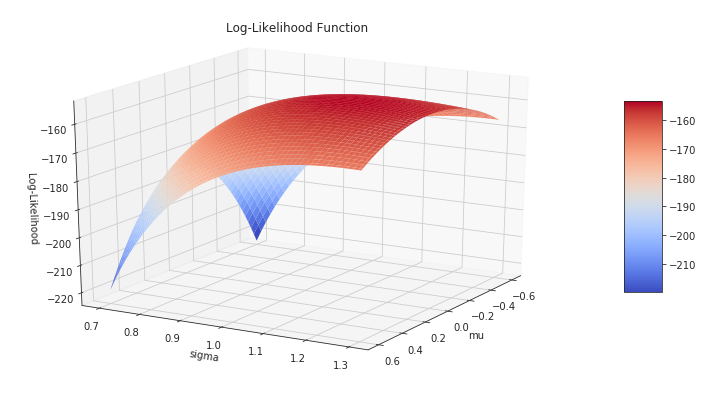

In [14]:
np.random.seed(5471)
plot_loglikelihood(100)